# 事前準備
以下を実行してください。   
**このセルはColaboratoryを起動するたびに必要となります**   

In [ ]:
import os

os.makedirs('fig', exist_ok=True)

# 世界銀行（World Bank)からのデータ獲得

世界銀行は、189ヶ国各が加盟し、国の中央政府または同政府から債務保証を受けた機関に対し融資を行う国際機関です。  
貧困、経済、気候変動、保険、教育、ジェンダーなどの分野で、約8000の開発指標を無料公開しています。   
一覧は[こちら](https://data.worldbank.org/indicator)のサイトで提供されています。

たとえば"Economy & Growth"の"GDP per capita (current US$)"を見て見ましょう。  
リンクをたどると   

[https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart)

というアドレスのサイトが開きます。アドレスの「indicator/」の後に続く「NY.GDP.PCAP.CD」がこのデータのインディケータです。   
pandas-datareaderでこのインディケータを指定すると、"GDP per capita (current US$)"のデータを取得することができます。

## GDP per capita (current US$)：一人当たりのGDP （ドル建て）を取得しよう

In [ ]:
from pandas_datareader import wb

# 1990年から2017年までの中国（CN), 日本（JP)、米国（US)のデータを取ってきます
df = wb.download(indicator='NY.GDP.PCAP.CD', country=['CN', 'JP', 'US'],
                start=1990, end=2021)
# 出力してみましょう
print(df)

                    NY.GDP.PCAP.CD
country       year                
China         2021    12556.333120
              2020    10408.669756
              2019    10143.838196
              2018     9905.342004
              2017     8816.986905
...                            ...
United States 1994    27694.853416
              1993    26387.293734
              1992    25418.990776
              1991    24342.258905
              1990    23888.600009

[96 rows x 1 columns]


1列のデータとしてダウンロードされるため、これを行列に変換します。

In [ ]:
df2 = df.unstack(level=0)
df2.head()

NY.GDP.PCAP.CD                            
country          China         Japan United States
year                                              
1990        317.884673  25371.464171  23888.600009
1991        333.142145  28915.008205  24342.258905
1992        366.460692  31414.984637  25418.990776
1993        377.389839  35681.963942  26387.293734
1994        473.492279  39933.515056  27694.853416

折れ線グラフで表示してみましょう。

In [ ]:
%matplotlib notebook

df2.columns = ['China', 'Japan', 'United States'] # 凡例を書き出し
df2.plot(grid=True) # グリッド線を描画

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Unemployment, total ：失業率（男女合計）
失業率のインディケータは「SL.UEM.TOTL.ZS」です。  
[https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?locations=JP-CN-US&view=chart](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?locations=JP-CN-US&view=chart)   
グラフを描画してみましょう。

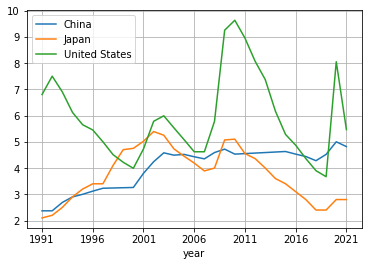

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_datareader import wb

# 1991年から2018年までの中国（CN), 日本（JP)、米国（US)のデータを取ってきます
df = wb.download(indicator='SL.UEM.TOTL.ZS', country=['CN', 'JP', 'US'],
                start=1991, end=2021)
df2 = df.unstack(level=0)

df2.columns = ['China', 'Japan', 'United States']
df2.plot(grid=True)
plt.show()
plt.savefig('fig/WorldBank_SL.UEM.TOTL.ZS.png') # 図を画像として保存